In [8]:
# importing the libaries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
# final output categories.
categories = {}
for i in range(10):
    categories['digit_' + str(i)] = i
print(categories)

{'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}


In [22]:
# lets create the dataset
data = []
def create_data():
    for fol_name, category in categories.items():
        path = 'data/' + fol_name
        target = category
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, (32, 32))
            data.append([new_img_array, target])
            
create_data()

In [23]:
print(len(data))

1404


In [24]:
# first training example.
print("One training example : ", data[0])
print("----------------------------------------------------")
print("image array : ", data[0][0])
print("----------------------------------------------------")
print("image array shape : ", data[0][0].shape)
print("----------------------------------------------------")
print("category label : ", data[0][1])

One training example :  [array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 22,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
----------------------------------------------------
image array :  [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 22  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
----------------------------------------------------
image array shape :  (32, 32)
----------------------------------------------------
category label :  0


In [27]:
# last training example
print("One training example : ", data[-1])
print("----------------------------------------------------")
print("image array : ", data[-1][0])
print("----------------------------------------------------")
print("image array shape : ", data[-1][0].shape)
print("----------------------------------------------------")
print("category label : ", data[-1][1])

One training example :  [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 9]
----------------------------------------------------
image array :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 3 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
----------------------------------------------------
image array shape :  (32, 32)
----------------------------------------------------
category label :  9


In [28]:
# splitting the data into X and y.

X, y = [], []
for i in range(len(data)):
    X.append(data[i][0])
    y.append(data[i][1])

In [29]:
print("One training example's X [input image] : ", X[0])
print("----------------------------------------------------")
print("One training example's shape : ", X[0].shape)
print("----------------------------------------------------")
print("One training example's y [label/category] : ", y[0])

One training example's X [input image] :  [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 22  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
----------------------------------------------------
One training example's shape :  (32, 32)
----------------------------------------------------
One training example's y [label/category] :  0


In [30]:
X = np.array(X)
y = np.array(y)
y = pd.get_dummies(y)

In [36]:
X = X.reshape(-1, 32, 32, 1)

In [38]:
print(X.shape)
print(y.shape)

print("----------------------------------------------------")
print("One training example's shape : ", X[0].shape)
print("----------------------------------------------------")
print("One training example's y [label/category] : \n", y)

(1404, 32, 32, 1)
(1404, 10)
----------------------------------------------------
One training example's shape :  (32, 32, 1)
----------------------------------------------------
One training example's y [label/category] : 
       0  1  2  3  4  5  6  7  8  9
0     1  0  0  0  0  0  0  0  0  0
1     1  0  0  0  0  0  0  0  0  0
2     1  0  0  0  0  0  0  0  0  0
3     1  0  0  0  0  0  0  0  0  0
4     1  0  0  0  0  0  0  0  0  0
...  .. .. .. .. .. .. .. .. .. ..
1399  0  0  0  0  0  0  0  0  0  1
1400  0  0  0  0  0  0  0  0  0  1
1401  0  0  0  0  0  0  0  0  0  1
1402  0  0  0  0  0  0  0  0  0  1
1403  0  0  0  0  0  0  0  0  0  1

[1404 rows x 10 columns]


In [39]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [40]:
# split the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

In [41]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X train shape :  (982, 32, 32, 1)
y train shape :  (982, 10)
X test shape :  (422, 32, 32, 1)
y test shape :  (422, 10)


In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import datetime

In [43]:
num_classes = len(categories)

10

In [53]:
# building a Single Layer Neural Network.
nodes = [8, 16, 32, 64, 128, 256, 512, 1028]
history = []
for node in nodes:
    model = Sequential()
    model.add(Flatten(input_shape = (32, 32, 1)))
    model.add(Dense(node, activation = 'relu', name = 'layer_1'))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    # model summary
    model.summary()
    print("-------------------------------------------------") 
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    history.append(model.fit(X_train, y_train, epochs = 20, batch_size = 64, verbose = 0))
    
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------")    

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
layer_1 (Dense)              (None, 8)                 8200      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------
31/31 [==============================] - 0s 1ms/step - loss: 2.1211 - accuracy: 0.4745
Model :  1403
Training loss :  2.12111496925354
Training accuracy :  0.4745417535305023
-------------------------------------------------
Model: "sequential_10"
_________________________________________________________________
Layer (type)      

In [56]:
len(history)

8

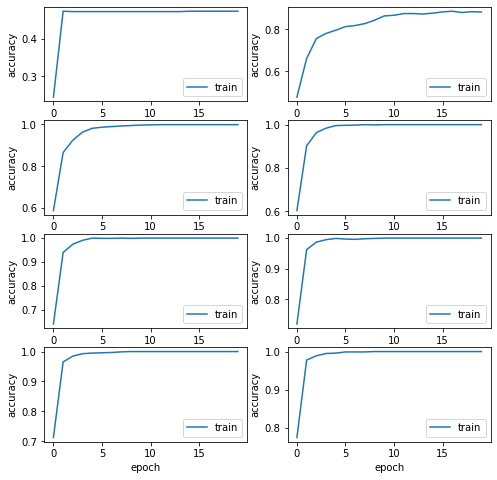

In [76]:
fig = plt.figure(figsize = (8, 8))

for i in range(len(history)):
    fig.add_subplot(4, 2, i + 1)
    plt.plot(history[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

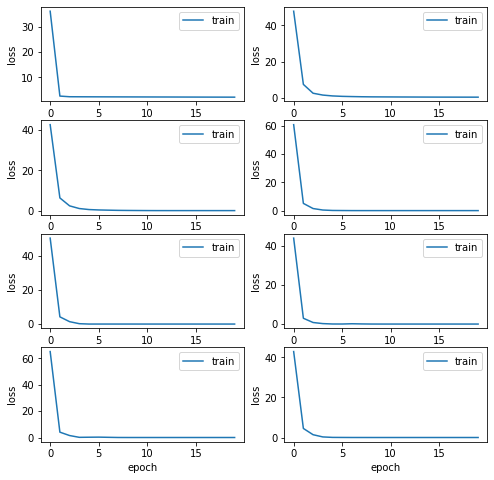

In [75]:
fig = plt.figure(figsize = (8, 8))

for i in range(len(history)):
    fig.add_subplot(4, 2, i + 1)
    plt.plot(history[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
plt.show()

In [78]:
layers = [2, 3, 4, 5]
history = []
for layer in layers:
    model = Sequential()
    model.add(Flatten(input_shape = (32, 32, 1)))
    for i in range(layer):
        model.add(Dense(32, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    # model summary
    model.summary()
    print("-------------------------------------------------") 
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    history.append(model.fit(X_train, y_train, epochs = 20, batch_size = 64, verbose = 0))
    
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------")    
    

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------
31/31 [==============================] - 0s 869us/step - loss: 1.2183e-04 - accuracy: 1.0000
Model :  1
Training loss :  0.00012183219951111823
Training accuracy :  1.0
----------------------------

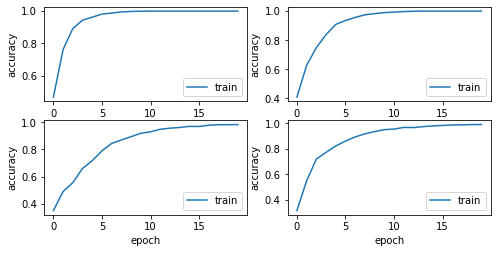

In [79]:
fig = plt.figure(figsize = (8, 8))

for i in range(len(history)):
    fig.add_subplot(4, 2, i + 1)
    plt.plot(history[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

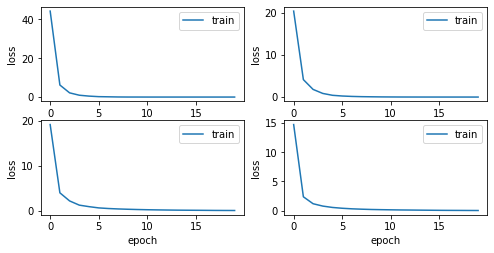

In [80]:
fig = plt.figure(figsize = (8, 8))

for i in range(len(history)):
    fig.add_subplot(4, 2, i + 1)
    plt.plot(history[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
plt.show()

In [81]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 10)              

In [82]:
predictions = model.predict(X_test)

In [84]:
y_pred = np.argmax(predictions, axis = 1)

In [88]:
# evaluating the model on training set
score = model.evaluate(X_train, y_train)
print("Model loss : ", score[0])
print("Model accuracy : ", score[1])

31/31 [==============================] - 0s 912us/step - loss: 0.0439 - accuracy: 0.9919
Model loss :  0.043911464512348175
Model accuracy :  0.9918533563613892


In [89]:
# evaluating the model on testing set
score = model.evaluate(X_test, y_test)
print("Model loss : ", score[0])
print("Model accuracy : ", score[1])

14/14 [==============================] - 0s 891us/step - loss: 0.6864 - accuracy: 0.8412
Model loss :  0.6863976716995239
Model accuracy :  0.8412322402000427


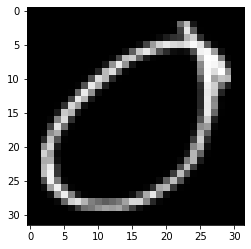

In [110]:
img = X_test[32]
plt.imshow(img.reshape(32, 32), cmap = 'gray')

In [119]:
pred = model.predict(img.reshape(-1, 32, 32, 1))
print(np.argmax(pred))

0


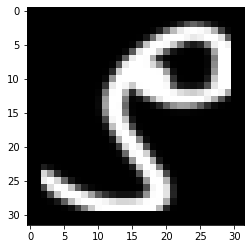

In [120]:
img = X_test[0]
plt.imshow(img.reshape(32, 32), cmap = 'gray')

In [121]:
pred = model.predict(img.reshape(-1, 32, 32, 1))
print(np.argmax(pred))

9
